In this notebook I am only interested in plotting basic data agregated by countries for the main occidental countries.

In [49]:
import sys

sys.path.append('../')

In [50]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd

%matplotlib inline

In [51]:
from covid.data_download import download_data_from_kaggle
from definitions import DATA_DIR, ROOT_DIR

In [52]:
download_data_from_kaggle()
downloaded_files = list((ROOT_DIR / DATA_DIR).glob('*.csv'))

print(f"Downloaded files:\n{chr(10).join(str(f.name) for f in downloaded_files)}")

covid19-global-forecasting-week-1.zip: Skipping, found more recently modified local copy (use --force to force download)
Downloaded files:
test.csv
train.csv
submission.csv


In [53]:
data_dir = ROOT_DIR / DATA_DIR
file_train = data_dir / 'train.csv'
file_test = data_dir / 'test.csv'

In [68]:
data_train = pd.read_csv(file_train, parse_dates=['Date'])
data_train.sample(10)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
10263,15640,NaN,New Zealand,-40.9006,174.8860,2020-02-06,0.0,0.0
16529,25170,Wisconsin,US,44.2685,-89.6165,2020-03-21,282.0,4.0
13859,21124,Guam,US,13.4443,144.7937,2020-02-03,0.0,0.0
6713,10234,NaN,Gabon,-0.8037,11.6094,2020-01-25,0.0,0.0
6198,9431,France,France,46.2276,2.2137,2020-02-28,57.0,2.0
10415,15856,NaN,North Macedonia,41.6086,21.7453,2020-03-07,3.0,0.0
13417,20426,Colorado,US,39.0598,-105.3111,2020-03-20,363.0,4.0
15475,23572,Oklahoma,US,35.5653,-96.9289,2020-03-04,0.0,0.0
3880,5897,Jiangsu,China,32.9711,119.4550,2020-02-28,631.0,0.0
10872,16569,NaN,Poland,51.9194,19.1451,2020-02-05,0.0,0.0


I will drop the `Province/State`, `Lat`, `Long`.
For countries with a mainland and other territories (France and United Kingdom), I will keep the mainland. In the future, I may select some States form the USA.

In [69]:
rename_dict = {'Province/State': 'state', 'Country/Region': 'country', 'ConfirmedCases': 'cases', 'Fatalities': 'death'}
data_train = data_train.rename(columns=rename_dict).rename(columns=lambda x: x.lower())

data_train.columns

Index(['id', 'state', 'country', 'lat', 'long', 'date', 'cases', 'death'], dtype='object')

In [70]:
country_list = ['France', 'Italy', 'Germany', 'Sweden', 'United Kingdom', 'Norway']

data = data_train.loc[data_train.country.isin(country_list) & ((data_train.country == data_train.state) | data_train.state.isna())]

In [71]:
data = data.loc[:, ['country', 'date', 'cases', 'death']]

In [72]:
data = data.set_index('date')

In [73]:
data.groupby('country')

In [74]:
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

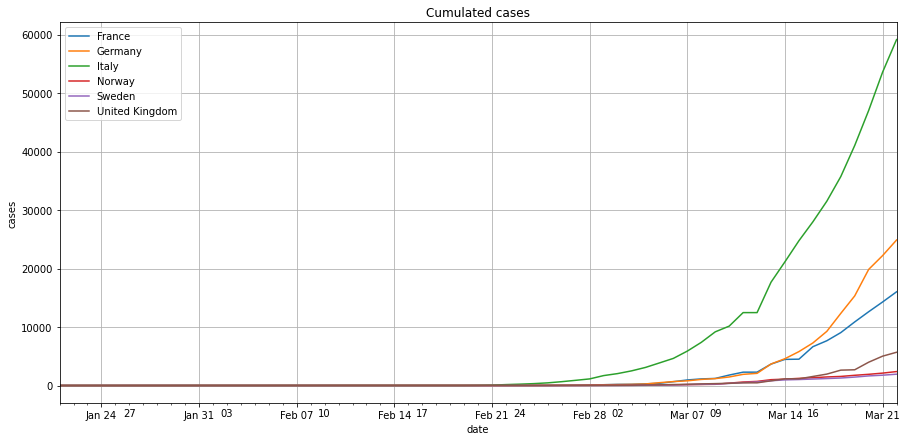

In [85]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

y_data = 'cases'
data.groupby('country')[y_data].plot(kind='line', legend=True, grid=True, title='Cumulated cases', ax=ax)
ax.set(ylabel=y_data)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# plt.show()

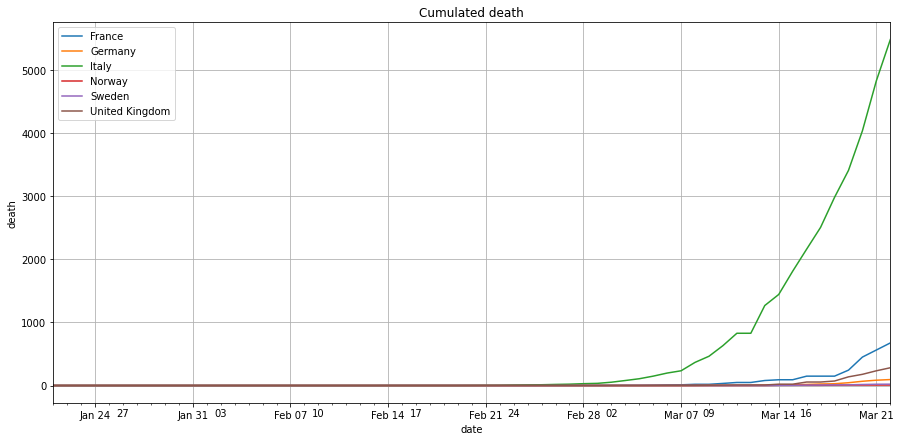

In [84]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

y_data = 'death'
data.groupby('country')[y_data].plot(kind='line', legend=True, grid=True, title='Cumulated death', ax=ax)
ax.set(ylabel=y_data)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# plt.show()